<a href="https://colab.research.google.com/github/Sirayus/csv_file/blob/main/2021MAY08_movie_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [3]:
uploaded = files.upload()

Saving MovieGenre.csv to MovieGenre.csv


In [87]:
df = pd.read_csv('/content/MovieGenre.csv', encoding='ISO-8859-1')

In [85]:
df.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40108 entries, 0 to 40107
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdbId      40108 non-null  int64  
 1   Imdb Link   40108 non-null  object 
 2   Title       40108 non-null  object 
 3   IMDB Score  40060 non-null  float64
 4   Genre       39963 non-null  object 
 5   Poster      39383 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.8+ MB


In [76]:
df.describe()

,imdbId,IMDB Score
count,4.010800e+04,40060.000000
mean,8.487510e+05,6.418250
std,1.151825e+06,1.141679
min,3.000000e+00,1.200000
25%,8.225825e+04,5.800000
50%,2.599660e+05,6.600000
75%,1.328869e+06,7.200000
max,6.098922e+06,9.500000


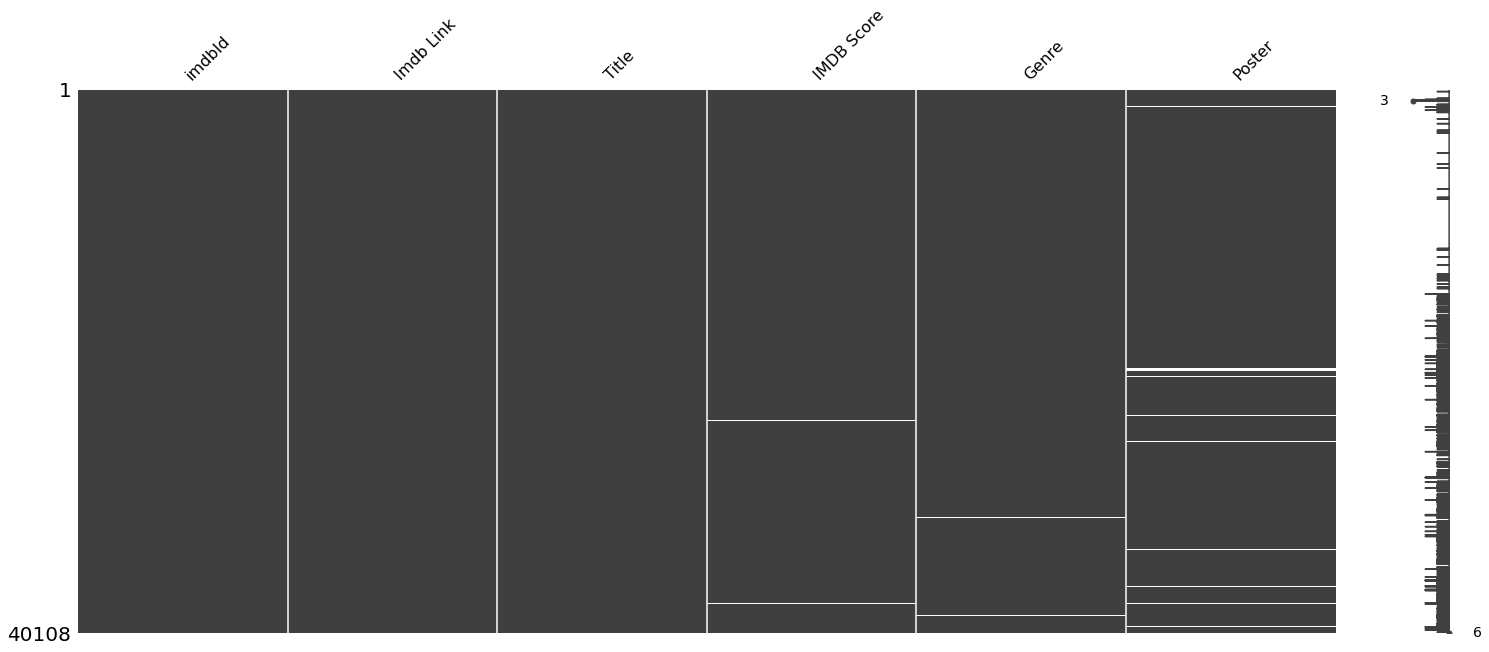

In [77]:
msno.matrix(df)

In [109]:
genre = df.loc[:, ['Title', 'IMDB Score',	'Genre']]

In [110]:
genre

,Title,IMDB Score,Genre
0,Toy Story (1995),8.3,Animation|Adventure|Comedy
1,Jumanji (1995),6.9,Action|Adventure|Family
2,Grumpier Old Men (1995),6.6,Comedy|Romance
3,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance
4,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance
...,...,...,...
40103,Tanya's Island (1980),4.3,Drama
40104,Pacific Banana (1981),4.7,Comedy
40105,Werewolf in a Womens Prison (2006),4.5,Horror
40106,Xiao zi ming da (1979),6.5,Action|Comedy


In [111]:
genre[['Genre_1', 'Genre_2', 'Genre_3']] = genre['Genre'].str.split('|', expand = True)

In [112]:
genre.fillna('No Information', inplace=True)

In [113]:
genre

,Title,IMDB Score,Genre,Genre_1,Genre_2,Genre_3
0,Toy Story (1995),8.3,Animation|Adventure|Comedy,Animation,Adventure,Comedy
1,Jumanji (1995),6.9,Action|Adventure|Family,Action,Adventure,Family
2,Grumpier Old Men (1995),6.6,Comedy|Romance,Comedy,Romance,No Information
3,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,Comedy,Drama,Romance
4,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,Comedy,Family,Romance
...,...,...,...,...,...,...
40103,Tanya's Island (1980),4.3,Drama,Drama,No Information,No Information
40104,Pacific Banana (1981),4.7,Comedy,Comedy,No Information,No Information
40105,Werewolf in a Womens Prison (2006),4.5,Horror,Horror,No Information,No Information
40106,Xiao zi ming da (1979),6.5,Action|Comedy,Action,Comedy,No Information


In [114]:
genre['Genre_1'].value_counts()

Drama             9902
Comedy            9733
Action            4739
Documentary       3843
Crime             2556
Horror            1975
Adventure         1684
Animation         1665
Biography         1226
Short              457
Thriller           403
Western            320
Fantasy            273
Mystery            257
Family             250
Romance            206
Sci-Fi             197
No Information     145
Musical            117
War                 65
Music               40
History             24
Film-Noir           16
Adult               10
Talk-Show            3
Sport                2
Name: Genre_1, dtype: int64

In [115]:
genre['Genre_2'].value_counts()

No Information    10743
Drama              8037
Romance            3172
Comedy             2187
Crime              2130
Adventure          1836
Thriller           1708
Horror             1421
Mystery            1141
Family              990
Fantasy             873
Sci-Fi              843
History             768
Biography           702
Music               700
Short               566
Action              517
War                 489
Musical             437
Western             290
Sport               280
Film-Noir           139
Animation            67
Documentary          36
News                 28
Adult                 3
Talk-Show             2
Reality-TV            2
Game-Show             1
Name: Genre_2, dtype: int64

In [116]:
genre['Genre_3'].value_counts()

No Information    23211
Romance            2846
Thriller           2705
Drama              2114
Mystery             997
Sci-Fi              980
Fantasy             866
Family              860
Comedy              762
History             634
War                 619
Horror              594
Crime               584
Music               552
Sport               425
Adventure           309
Musical             291
Film-Noir           248
Western             243
Action               75
Biography            71
News                 55
Short                43
Animation            18
Documentary           3
Talk-Show             2
Adult                 1
Name: Genre_3, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

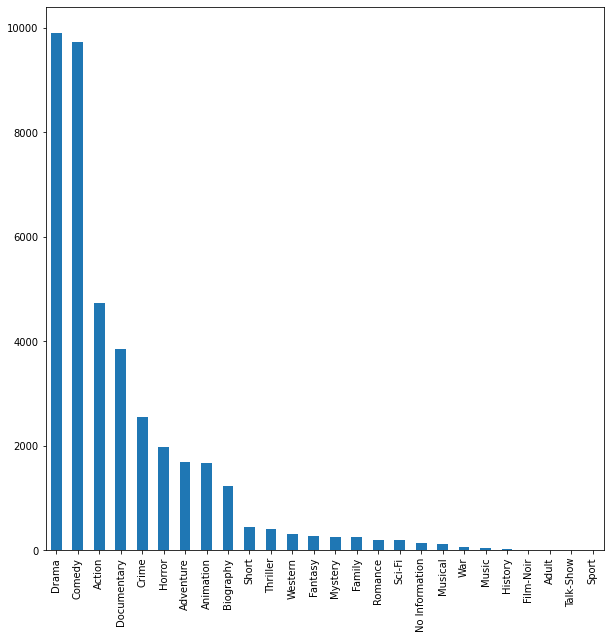

In [125]:
genre['Genre_1'].value_counts().plot(kind='bar', figsize=(10,10))
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

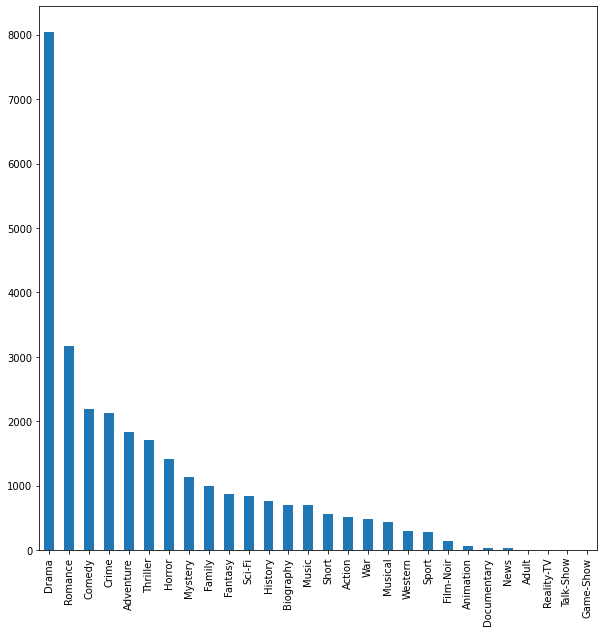

In [121]:
genre[genre['Genre_2'] != 'No Information']['Genre_2'].value_counts().plot(kind='bar', figsize=(10,10)) #After strip, many movies don't have second genre
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

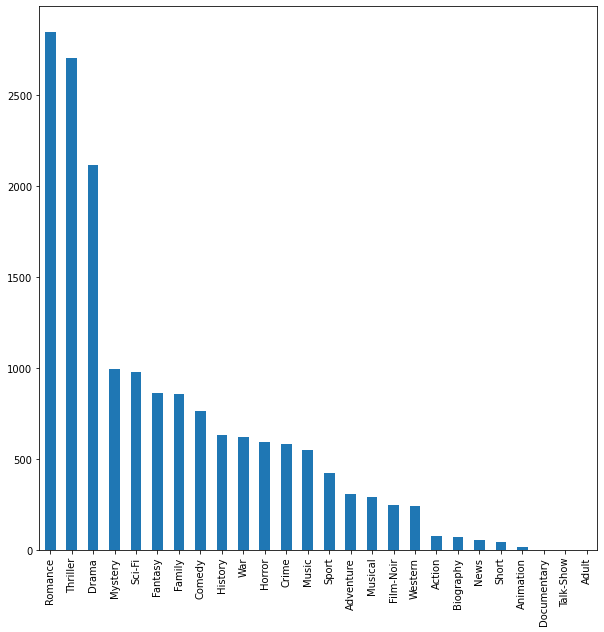

In [123]:
genre[genre['Genre_3'] != 'No Information']['Genre_3'].value_counts().plot(kind='bar', figsize=(10,10)) #After strip, many movies don't have third genre
plt.xticks()

In [126]:
# genre.to_csv('genre.csv')